In [1]:
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv("songsDataset.csv",encoding="utf-8",header=0,
                       names=["user_id","song_id","rating"])

In [3]:
data.head(5)

,user_id,song_id,rating
0,0,7171,5
1,0,8637,4
2,0,21966,4
3,0,35821,5
4,0,82446,5


In [15]:
known_songs = (data
             .groupby(by = ['song_id'])['rating']
             .count()
             .reset_index()
             .rename(columns = {'rating': 'frequency'})
             [['song_id', 'frequency']]
            )

In [18]:
#sorting dataframe by most known songs to the least known
known_songs.sort_values(by=['frequency'], ascending=False).head(10)

,song_id,frequency
2549,2726,1904
21321,22763,1880
98525,105433,1720
40988,43827,1600
115106,123176,1583
51977,55622,1557
15473,16548,1548
22863,24427,1536
34205,36561,1534
67563,72309,1516


In [19]:
popular_songs = (data
             .groupby(by = ['song_id'])['rating']
             .sum()
             .reset_index()
             .rename(columns = {'rating': 'popularity'})
             [['song_id', 'popularity']]
            )

In [21]:
popular_songs.sort_values(by=['popularity'], ascending=False).head(10)

,song_id,popularity
98525,105433,6428
21321,22763,6330
2549,2726,6276
12959,13859,5735
115106,123176,5613
22863,24427,5548
34205,36561,5523
7536,8063,5442
2118,2263,5431
40988,43827,5403


In [34]:
songs_data = pd.merge(known_songs, popular_songs)

In [35]:
songs_data['mean'] = songs_data.apply(lambda row: row['popularity']/row['frequency'], axis=1)
songs_data.head(10)

,song_id,frequency,popularity,mean
0,0,5,14,2.800000
1,1,2,5,2.500000
2,2,4,20,5.000000
3,3,18,47,2.611111
4,4,2,9,4.500000
5,6,2,7,3.500000
6,7,9,27,3.000000
7,8,4,19,4.750000
8,9,4,15,3.750000
9,10,2,8,4.000000


In [36]:
songs_matrix = songs_data.set_index("song_id")

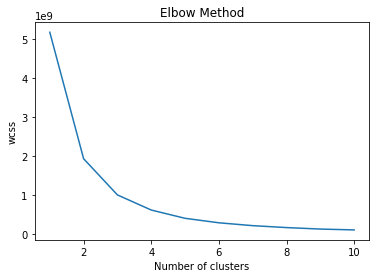

In [37]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(songs_matrix)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [45]:
cluster = KMeans(n_clusters= 4)
songs_matrix["cluster"] = cluster.fit_predict(songs_matrix)

In [49]:
songs_matrix.to_csv("songs_matrix.csv",encoding="utf-8")